In [1]:
from keras.models import load_model
from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
#Importar modelos
basic_model = load_model('./BasicNeuralNetwork/basic.h5')
convolutional_model = load_model('./ConvolutionalNetwork/convolutional.h5')

models = [basic_model, convolutional_model]
# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Cargamos el dataset de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
# Cargamos los datos de entrenamiento y test
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizamos las imágenes
test_images = test_images / 255.0

In [5]:
def get_accuracy_loss_table(models):
    table = pd.DataFrame(columns=['Model', 'Accuracy', 'Loss'])
    for model in models:
        model_name = model.name
        accuracy, loss = model.evaluate(test_images, test_labels, verbose=0)
        table.loc[len(table)] = [model_name, round(accuracy, 2), round(loss, 2)]

    return table

In [6]:
print(get_accuracy_loss_table(models))

          Model  Accuracy  Loss
0    sequential      0.37  0.87
1  sequential_3      0.27  0.90


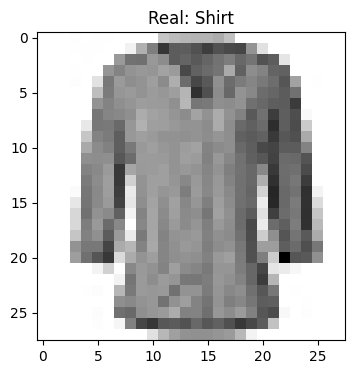

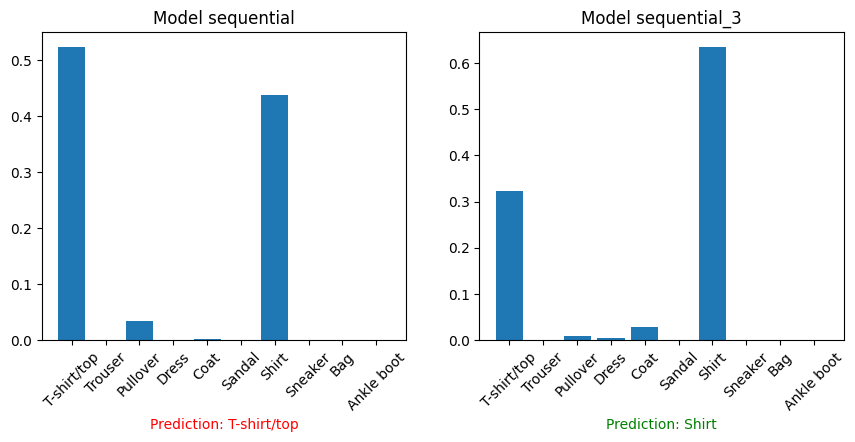

In [7]:
def make_prediction(models, number):
    plt.figure(figsize=(12, 4))
    plt.imshow(test_images[number], cmap=plt.cm.binary)
    plt.title(f"Real: {class_names[test_labels[number]]}")

    plt.figure(figsize=(16, 4))
    i = 0
    for model in models: 
        result = model.predict(test_images[number].reshape(1, 28, 28), verbose=0).tolist()[0]
        
        plt.subplot(1, len(models) + 1, i + 1)
        plt.bar(class_names, result)
        plt.title(f"Model {model.name}")
        plt.xticks(rotation=45)
        
        plt.xlabel(f"Prediction: {class_names[result.index(max(result))]}", color='green' if result.index(max(result)) == test_labels[number] else 'red')
        
        i += 1

make_prediction(models, 4)
